In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.metrics import confusion_matrix

/home/aakash0121/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('MNIST_data/', one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
len(data.train.labels)

55000

In [4]:
len(data.test.labels)

10000

In [5]:
len(data.validation.labels)

5000

In [6]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [7]:
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
num_classes = 10

In [8]:
def plot_images(images, cls_true, cls_pred = None):
    assert len(images) == len(cls_true) == 9
    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap = 'binary')
        
        if cls_pred is None:
            x_label = "true : {0}".format(cls_true[i])
        else:
            x_label = "true : {0} , pred : {1})".format(cls_true[i], cls_pred[i])
        
        ax.set_xlabel(x_label)
    
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show() 

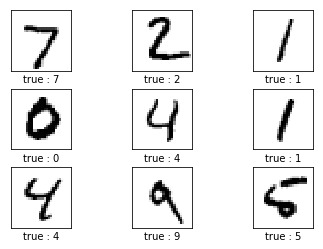

In [9]:
images = data.test.images[0 : 9]
cls_true = data.test.cls[0 : 9]
plot_images(images = images, cls_true = cls_true)

In [10]:
x = tf.placeholder(tf.float32, shape = [None, img_size_flat])

y_true = tf.placeholder(tf.float32, shape = [None, num_classes])

y_true_cls = tf.placeholder(tf.int64, shape = [None])

In [40]:
weights = tf.Variable(tf.ones([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

In [41]:
logits = tf.matmul(x, weights) + biases

In [42]:
y_pred = tf.nn.softmax(logits)

In [43]:
y_pred_cls = tf.argmax(y_pred, axis = 1)

In [44]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = y_true)

In [45]:
cost = tf.reduce_mean(cross_entropy)

In [46]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(cost)

In [47]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [48]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [49]:
session = tf.Session()

In [50]:
session.run(tf.global_variables_initializer())

In [51]:
batch_size = 100

In [52]:
def optimize(num_iterations):
    for i in range(num_iterations):
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        
        feed_dict_train = {x : x_batch, y_true : y_true_batch}
        
        session.run(optimizer, feed_dict = feed_dict_train)
    

In [53]:
feed_dict_test = {x : data.test.images, y_true : data.test.labels, y_true_cls : data.test.cls}

In [54]:
def print_accuracy():
    acc = session.run(accuracy, feed_dict = feed_dict_test)
    
    print("accuracy on the test set is : {0:.2%}".format(acc))

In [55]:


def print_confusion_matrix():

    cls_true = data.test.cls
    
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()



In [56]:


def plot_example_errors():

    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    incorrect = (correct == False)
    
    images = data.test.images[incorrect]

    cls_pred = cls_pred[incorrect]
    
    cls_true = data.test.cls[incorrect]

    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])



In [57]:


def plot_weights():
    
    w = session.run(weights)
    
    w_min = np.min(w)
    w_max = np.max(w)
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        if i<10:
            image = w[:, i].reshape(img_shape)

            ax.set_xlabel("Weights: {0}".format(i))

            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()



In [58]:
optimize(1000)

In [59]:
print_accuracy()

accuracy on the test set is : 78.77%


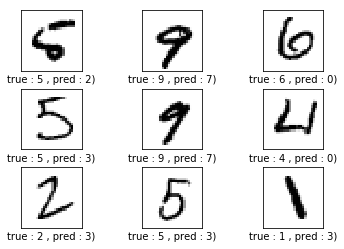

In [60]:
plot_example_errors()

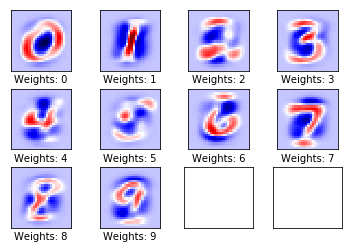

In [61]:
plot_weights()

[[ 945    0    3    5    0    0   19    1    7    0]
 [   0 1079   14    7    0    0    4    1   30    0]
 [  46   41  793   43   12    0   40   19   36    2]
 [  16    7   25  890    0    0    9   18   32   13]
 [   9   15    7    2  728    0   42    3   21  155]
 [ 118   46   13  281   16  193   53   33   98   41]
 [  52   16   17    2    4    2  859    0    6    0]
 [  15   53   29    0    5    0    4  875   13   34]
 [  27   33   17  116    6    0   25   16  712   22]
 [  33   22   13   15   40    0    6   55   22  803]]


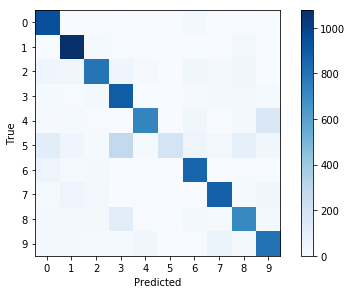

In [62]:
print_confusion_matrix()